In [1]:
import pandas as pd
import os

In [2]:
from urllib.request import urlretrieve

fname = "bikes-2017-2.csv"
if not os.path.exists(fname):
    urlretrieve(
        "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/d17a0a74-1073-46f0-a26e-46a403c061ec/download/2017verkehrszaehlungenwertefussgaengervelo.csv",
        fname
    )

In [3]:
!head bikes-2017-2.csv

In [4]:
data = pd.read_csv(fname, parse_dates=True, index_col='datum')

In [5]:
data.head()

,fk_zaehler,velo_in,velo_out,fuss_in,fuss_out,objectid
datum,,,,,,
2017-01-29 14:15:00,YPH15108550,NaN,NaN,35.0,30.0,4820779
2017-01-29 14:30:00,YPH15108550,NaN,NaN,32.0,38.0,4820780
2017-01-29 14:45:00,YPH15108550,NaN,NaN,45.0,34.0,4820781
2017-01-29 15:00:00,YPH15108550,NaN,NaN,34.0,44.0,4820782
2017-01-29 15:15:00,YPH15108550,NaN,NaN,21.0,24.0,4820783


In [6]:
station = 'ECO09113499'

In [7]:
data[data.fk_zaehler==station].head()

,fk_zaehler,velo_in,velo_out,fuss_in,fuss_out,objectid
datum,,,,,,
2017-02-03 00:00:00,ECO09113499,11.0,4.0,NaN,NaN,4826619
2017-02-03 00:15:00,ECO09113499,1.0,0.0,NaN,NaN,4826620
2017-02-03 00:30:00,ECO09113499,2.0,0.0,NaN,NaN,4826621
2017-02-03 00:45:00,ECO09113499,0.0,0.0,NaN,NaN,4826622
2017-02-03 01:00:00,ECO09113499,0.0,0.0,NaN,NaN,4826623


In [8]:
mythenquai = data[data.fk_zaehler==station]
mythenquai = mythenquai.drop(['fk_zaehler', "objectid", 'fuss_out', 'fuss_in'], axis=1)

In [9]:
mythenquai.head()

,velo_in,velo_out
datum,,
2017-02-03 00:00:00,11.0,4.0
2017-02-03 00:15:00,1.0,0.0
2017-02-03 00:30:00,2.0,0.0
2017-02-03 00:45:00,0.0,0.0
2017-02-03 01:00:00,0.0,0.0


In [10]:
mythenquai['Total'] = mythenquai.velo_in + mythenquai.velo_out
mythenquai.columns

Index(['velo_in', 'velo_out', 'Total'], dtype='object')

In [11]:
mythenquai.columns = ['North', 'South', 'Total']

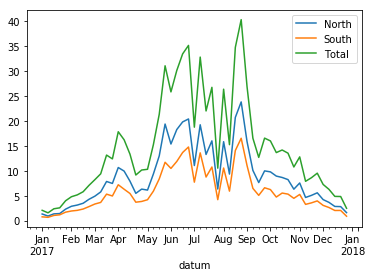

In [12]:
%matplotlib inline
mythenquai.resample('W').mean().plot()

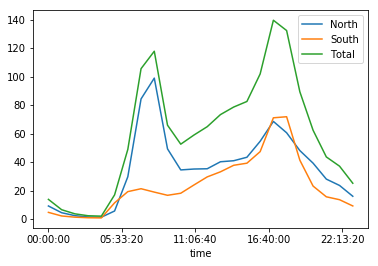

In [13]:
hourly = mythenquai.resample("H").sum()
hourly.groupby(hourly.index.time).mean().plot()

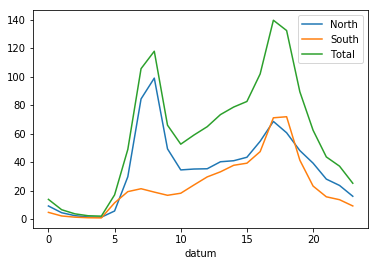

In [14]:
hourly = mythenquai.resample("H").sum()
hourly.groupby(hourly.index.hour).mean().plot()

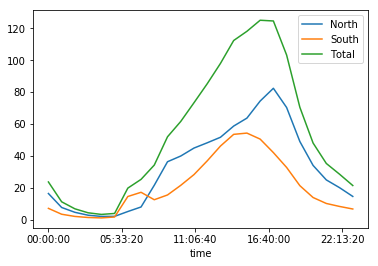

In [15]:
hourly = mythenquai.resample("H").sum()
hourly_week = hourly[~hourly.index.dayofweek.isin((0,1,2,3,4))]
hourly_week.groupby(hourly_week.index.time).mean().plot()